Date: Sept 12, 2020

Sanjib Katuwal

# Introduction to Quantum Computing

# 1. First Circuit

Importing some necessary materials

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit import *
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

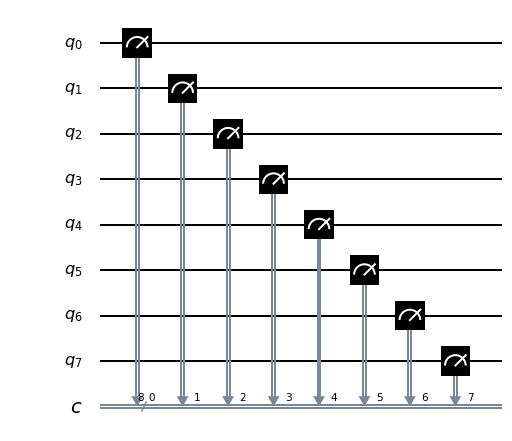

In [2]:
n=8
n_q=n
n_b=n
qc_output=QuantumCircuit(n_q,n_b)
for i in range(n):
    qc_output.measure(i,i)
qc_output.draw('mpl')

The following exercise will prove that the quantum qubits are initialized to give the output 0.

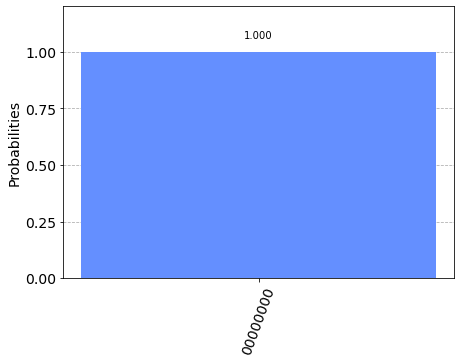

In [3]:
counts=execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# 2. Encoding your age
The binary of 30 is ${00011110}$

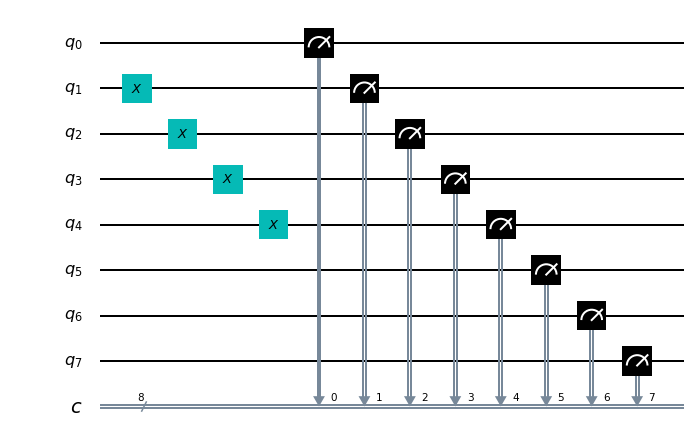

In [4]:
# Encoding you Age
qc_encode=QuantumCircuit(n)
for j in range(1,5):
    qc_encode.x(j)
    
# Coupling it to the output
qc=qc_encode+qc_output

#Checking the Circuit
qc.draw('mpl', justify='none')

Checking the output result

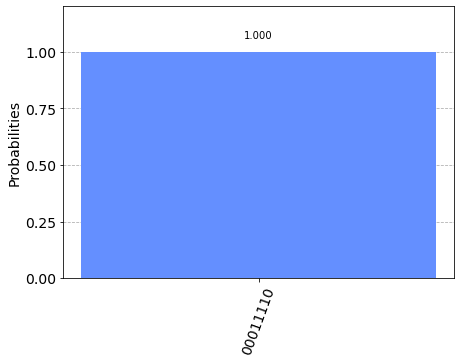

In [5]:
#Checking the result using Quantum Simulator
counts=execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


# 3. Construction of a Half Adder

In [6]:
def half_adder(q0,q1):
    """Takes two qubits as inputs and returns their sum as two output bits. Each a and b should either be 0 or 1."""
    
    # Initializing with a Quantum Circuit and feeding the input
    qc_ha=QuantumCircuit(4,2)
    if q0==1:
        qc_ha.x(0)
    if q1==1:
        qc_ha.x(1)
    qc_ha.barrier()
    
    # Using XOR gates (CNOT) to get the first digit of the output
    qc_ha.cx(0,2)
    qc_ha.cx(1,2)
    
    # Using AND gate (Toffoli) to get the second digit of the output
    qc_ha.ccx(0,1,3)
    qc_ha.barrier()
    
    # measuring the output
    qc_ha.measure(2,0)
    qc_ha.measure(3,1)
    
    return qc_ha

Checking the Circuit

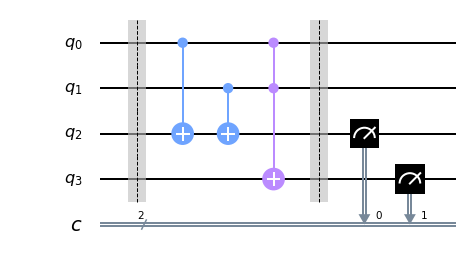

In [7]:
qc_ha=half_adder(q0=0,q1=0)
qc_ha.draw('mpl')

Checking the output result

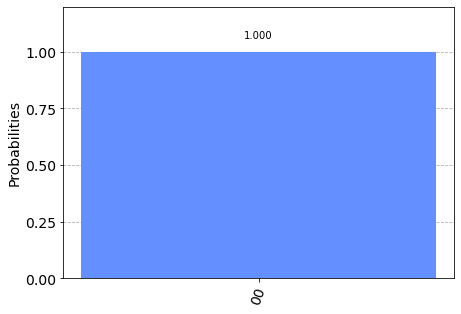

In [8]:
counts=execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# 4. Understanding State Vectors
So far we have seen that the qubits are either in the state 0 or in the state 1, 100% of the time. However, in quantum mechanics, any of their linear superposition is an allowed state. It means that any single state might have different probabilites of being 0 or 1. We shall see that here. We will consider the statevector to be:
$$|{q}>=\frac{1}{\sqrt{3}}|0>+j\sqrt{\frac{2}{3}}|1>$$

In [9]:
qc=QuantumCircuit(1)
initial_state=[1/sqrt(3),1j*(sqrt(2/3))]
qc.initialize(initial_state,0)

# Result from Simulation
result=execute(qc,Aer.get_backend('statevector_simulator')).result()
state=result.get_statevector()
counts=result.get_counts()

print(state)

[0.57735027+0.j         0.        +0.81649658j]


Checking the probabilities from the simulation

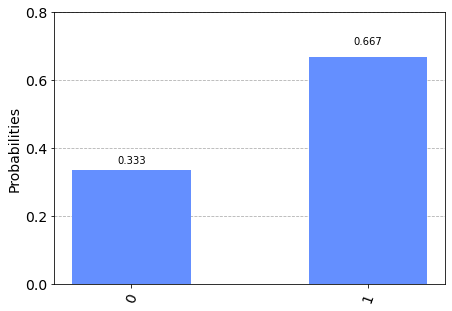

In [10]:
plot_histogram(counts)

# 5. Representation by Bloch Sphere
Any state vector, which in fact is a qubit in our case here, can be represented on a surface of a sphere of unit radius. This sphere is called Bloch Sphere. As the radius has been prefixed, only two variables, say $\theta$ and $\phi$ are necessary to represent the vector. Please note that Bloch vector in not the same as the statevector. Statevector lives in a two dimension complex space whereas bloch vector lives in a three dimensional real space. Bloch vectors are just a visual representation. Below we plot a vector $|q>=\frac{1}{\sqrt{2}}|0>+\frac{1}{\sqrt{2}}|1>$, for which $\theta=\pi/4$, $\phi=0$.

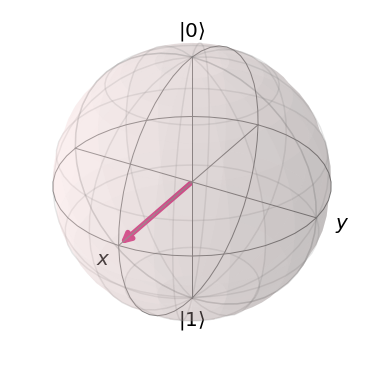

In [11]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords=[pi/2,0,1]
plot_bloch_vector_spherical(coords)

# 6. The Pauli Gates
As we have seen that the qubits are represented by Statevectors, we can expect, from our knowledge of Quantum Mechanics, that probably Operators like pauli matrices represent the Gates. The expectation is true, indeed. Corresponding to three Pauli matrices, we have three pauli gates, the x, y and z, gates. The x gate rotates a bloch vector by an angle of $\pi$ about the x-axis. Actually, the x-gate is nothing but the NOT gate, which we considered earlier. Similarly, the y- and z- gates represent the $\pi$ degree rotation of bloch vector about y- and z- axes, respectively.
$$
X=\begin{bmatrix}
0&1\\
1&0
\end{bmatrix}
=|0><1|+|1><0|
$$
$$
Y=\begin{bmatrix}
0&-i\\
i&0
\end{bmatrix}
=-i|0><1|+i|1><0|
$$
$$
Z=\begin{bmatrix}
1&0\\
0&-1
\end{bmatrix}
=|0><0|-|1><1|
$$
The eigenvectors corresponding to these three operators form three bases. The basis corresponding to X is $\{|+>,|->\}$. Similarly, bases corresponding to Y and Z operators are $\{|i>,|-i>\}$ and $\{|0>,|1>\}$, respectively.

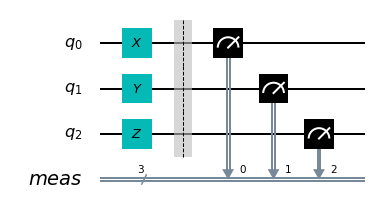

In [12]:
qc=QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.measure_all()
qc.draw('mpl')

# 7. Hadamard Gate
It is one of the most important gate in Quantum Computing. Only with the Pauli gates, we won't be able to move our initialized state to any other states except $(|0>,|1>)$. The Hadamard Gate will create a superposition of $|0>$ and $|1>$. The matrix for the Hadamard Gate and its action is given below:
$$
H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1&1\\
1&-1
\end{bmatrix}=|+><0|+|-><1|
$$
$$
H|0>=|+>
$$
$$
H|1>=|->
$$

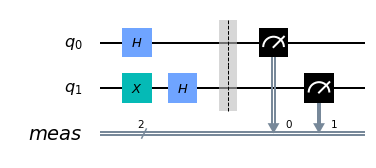

In [13]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.measure_all()
qc.draw('mpl')

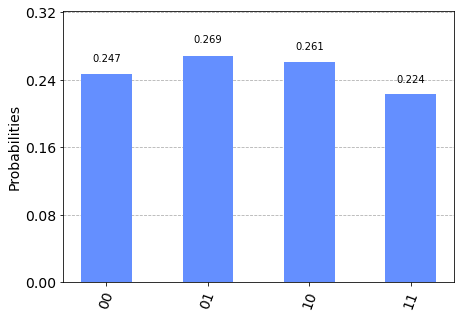

In [14]:
counts=execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# 8. Measuring by Changing Basis
## 8.1 Changing from Z basis to X basis
For the measurement in X basis, we note the following relation
$$HZH=X$$

In [111]:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis and store the result in cbit"""
    qc.h(qubit)
    qc.measure(qubit,cbit)
    qc.h(qubit)
    return qc

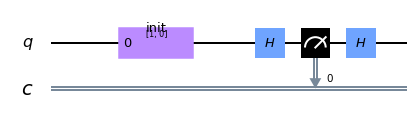

In [112]:
qc=QuantumCircuit(1,1)
initial_state=[1,0]
initializer=Initialize(initial_state)
initializer.label="init"
qc.append(initializer,[0])
x_measurement(qc,0,0)
qc.draw('mpl')

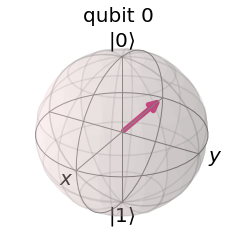

In [113]:
result=execute(qc,Aer.get_backend('statevector_simulator')).result()
out_state=result.get_statevector()
counts=result.get_counts()
plot_bloch_multivector(out_state)

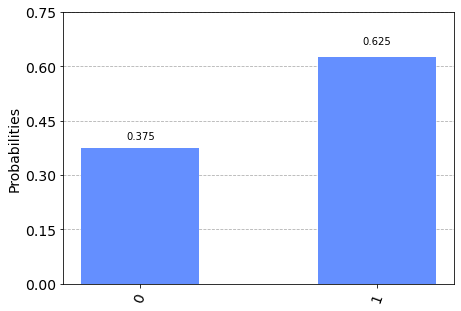

In [114]:
plot_histogram(counts)

## 8.2 Changing from Z basis to Y basis
For the measurement in Y basis, we note the following relation
(Yet to be done)

# 9. Other Important Gates
## 9.1 The $R_\phi$-gate
It is a rotation of around z-axis by an angle $\phi$. It is given by the matrix:
$$
R_\phi=
\begin{bmatrix}
1&0 \\
0&e^{i\phi}
\end{bmatrix}
$$
Note that the z-gate is an special case of $R_\phi$ gate with $\phi=\pi$.

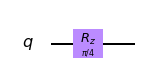

In [117]:
qc=QuantumCircuit(1)
qc.rz(pi/4,0)
qc.draw('mpl')

## 9.2 The I-gate
It is called identity gate. It simply does nothing.
$$
I=
\begin{bmatrix}
1&0 \\
0&1
\end{bmatrix}
$$
## 9.3 The S-gates
We define $S$ and $S^\dagger$ as the $R_\phi$ gate with $\phi=\pi/2,-\pi/2$, respectively.
$$
S=
\begin{bmatrix}
1&0 \\
0&e^{i\pi/2}
\end{bmatrix},\quad\quad S^\dagger=
\begin{bmatrix}
1&0 \\
0&e^{-i\pi/2}
\end{bmatrix}
$$
Applying S-gate twice gives Z-gate.

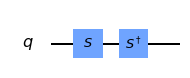

In [118]:
qc=QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.draw('mpl')

## 9.3 The T-gates
We define $T$ and $T^\dagger$ as the $R_\phi$ gate with $\phi=\pi/4,-\pi/4$, respectively.
$$
T=
\begin{bmatrix}
1&0 \\
0&e^{i\pi/4}
\end{bmatrix},\quad\quad T^\dagger=
\begin{bmatrix}
1&0 \\
0&e^{-i\pi/4}
\end{bmatrix}
$$
Applying T-gate four times gives Z-gate.

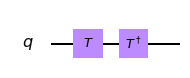

In [119]:
qc=QuantumCircuit(1)
qc.t(0)
qc.tdg(0)
qc.draw('mpl')

## 9.4 The General U-gates or Physical Gates
The most general single qubit quantum gate is the $U_3$-gate, which is defined as below:
$$
U_3(\theta,\phi,\lambda)=
\begin{bmatrix}
\cos(\theta/2)&-e^{i\lambda}\sin(\theta/2)\\
e^{i\phi}\sin(\theta/2)&e^{i\lambda+i\phi}\cos(\theta/2)
\end{bmatrix},\quad\quad U_2=U_3(\pi/2,\phi,\lambda),\quad\quad U_1=U_3(0,0,\lambda)
$$

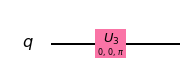

In [122]:
qc=QuantumCircuit(1)
qc.u3(0,0,pi,0) # the arguments are theta,phi,labmda and the last one is the qubit specification
qc.draw('mpl')